In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
car = pd.read_excel("Used_car_data1.xlsx")

In [3]:
car.head()

,Unnamed: 0,Brand,Model,Variant,Year,Kilometers,Fuel,Number_of_owners,Location,Transmission,Price
0,0,Maruti,AltoK10,VXI,2017,"11,691 km",Petrol,1st Owner,New Delhi,Manual,"₹3,45,699"
1,1,Maruti,Swift,LXI,2012,"31,999 km",Petrol,1st Owner,New Delhi,Manual,"₹2,94,399"
2,2,Maruti,Alto800,LXI,2017,"8,501 km",Petrol,1st Owner,New Delhi,Manual,"₹2,93,799"
3,3,Maruti,Alto800,VXI,2014,"12,535 km",Petrol,1st Owner,New Delhi,Manual,"₹2,93,599"
4,4,Maruti,AltoK10,VXI,2011,"20,354 km",Petrol,1st Owner,New Delhi,Manual,"₹2,12,799"


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2003 non-null   int64 
 1   Brand             2003 non-null   object
 2   Model             2003 non-null   object
 3   Variant           2003 non-null   object
 4   Year              2003 non-null   int64 
 5   Kilometers        2003 non-null   object
 6   Fuel              2003 non-null   object
 7   Number_of_owners  2003 non-null   object
 8   Location          2003 non-null   object
 9   Transmission      2003 non-null   object
 10  Price             2003 non-null   object
dtypes: int64(2), object(9)
memory usage: 172.3+ KB


# Preprocessing

In [5]:
car.drop(['Unnamed: 0'], axis = 1, inplace=True)

The target column is the 'Price'. We will need to remove the INR symbol, kilometers has km we will clean that column and understand the data more.

In [6]:
car['Brand'].value_counts()

Hyundai       200
Maruti        200
Renault       175
Honda         166
Ford          157
Volkswagen    152
Toyota        145
Tata          143
Mahindra      138
Skoda          93
BMW            83
Nissan         80
Chevrolet      76
Mercedes       64
Audi           60
KIA            52
Volvo          13
Jaguar          6
Name: Brand, dtype: int64

<AxesSubplot:xlabel='Brand', ylabel='count'>

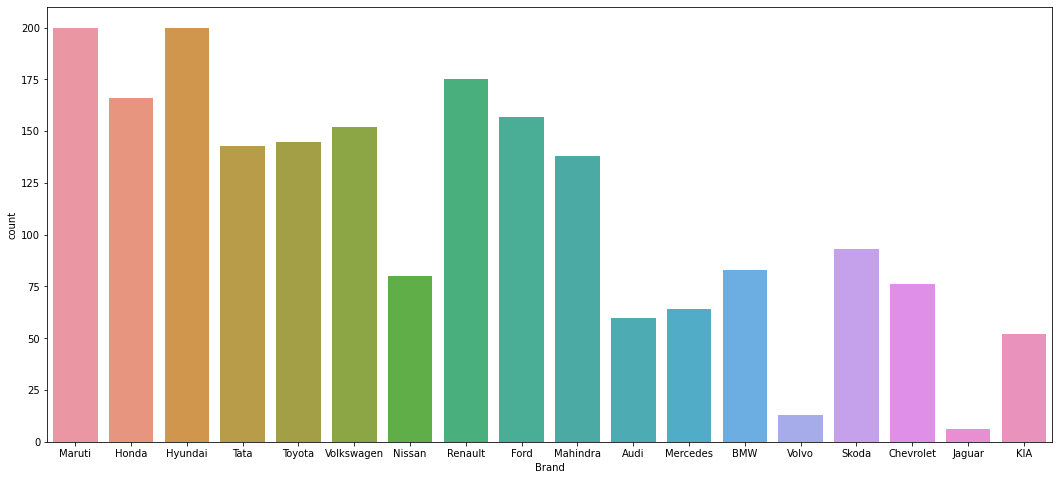

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(car['Brand'])

In [8]:
pd.options.display.max_rows = 999

In [9]:
car.groupby('Brand')['Model'].value_counts()

Brand       Model       
Audi        Q3               24
            A4               16
            A6                9
            A3                8
            TT                3
BMW         3Series          37
            5Series          25
            X1               15
            Mini              3
            X3                3
Chevrolet   Beat             39
            Spark            11
            Sail             10
            AveoUVA           7
            Cruze             5
            Enjoy             3
            SailUVA           1
Ford        Ecosport         97
            Figo             23
            FigoAspire       14
            NewFigo          14
            Fiesta            7
            FREESTYLE         2
Honda       City             51
            Brio             34
            Amaze            33
            Jazz             29
            WR-V              8
            BR-V              3
            CityZX            2
            Civ

In [10]:
car['Kilometers_cleaned'] = car['Kilometers'].replace(to_replace='km', value='',regex=True)

In [11]:
car['Kilometers_cleaned'] = car['Kilometers_cleaned'].replace(to_replace=',', value='',regex=True)

In [12]:
car['Price_cleaned'] = car['Price'].replace(to_replace='₹', value='',regex=True)

In [13]:
car['Price_cleaned'] = car['Price_cleaned'].replace(to_replace=',', value='',regex=True)

In [14]:
car.drop(['Kilometers','Price'], axis=1, inplace=True)

In [15]:
car.head(5)

,Brand,Model,Variant,Year,Fuel,Number_of_owners,Location,Transmission,Kilometers_cleaned,Price_cleaned
0,Maruti,AltoK10,VXI,2017,Petrol,1st Owner,New Delhi,Manual,11691,345699
1,Maruti,Swift,LXI,2012,Petrol,1st Owner,New Delhi,Manual,31999,294399
2,Maruti,Alto800,LXI,2017,Petrol,1st Owner,New Delhi,Manual,8501,293799
3,Maruti,Alto800,VXI,2014,Petrol,1st Owner,New Delhi,Manual,12535,293599
4,Maruti,AltoK10,VXI,2011,Petrol,1st Owner,New Delhi,Manual,20354,212799


In [16]:
car['Year_cleaned'] = 2021 - car['Year']

In [17]:
car.drop(['Year'], axis=1, inplace=True)

In [18]:
car['Kilometers_cleaned'] = car['Kilometers_cleaned'].astype(int)
car['Price_cleaned'] = car['Price_cleaned'].astype(int)

<AxesSubplot:xlabel='Brand', ylabel='Price_cleaned'>

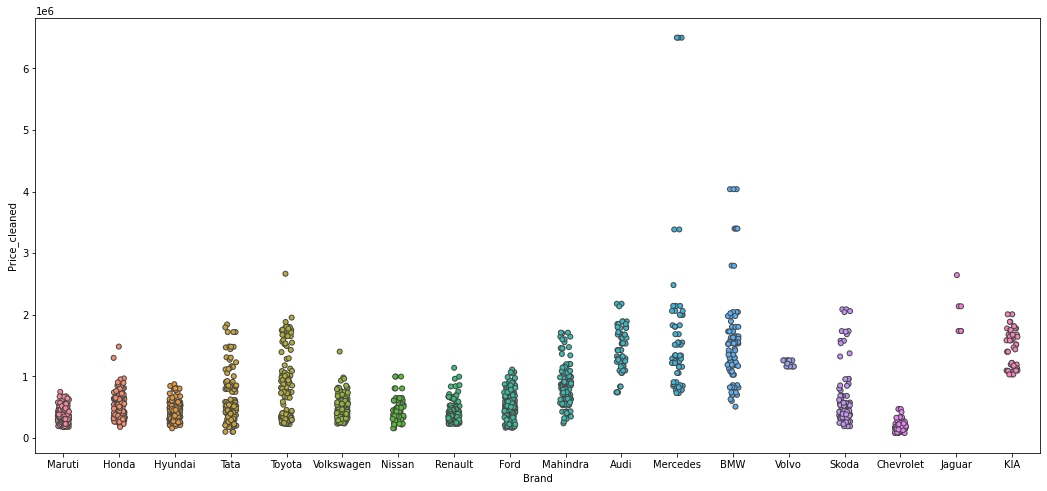

In [19]:
plt.figure(figsize=(18,8))
sns.stripplot(car['Brand'],car['Price_cleaned'], linewidth=1)

We can see Maruti have a low used car price and the highest would be Audi, Benz and BMW cars.

In [20]:
car.groupby('Brand')[['Price_cleaned','Kilometers_cleaned']].median().sort_values('Price_cleaned')

,Price_cleaned,Kilometers_cleaned
Brand,,
Chevrolet,165000.0,70931.0
Maruti,334799.0,20297.5
Renault,352599.0,26665.0
Hyundai,407499.0,26834.5
Honda,427499.0,47022.0
Nissan,438199.0,60298.5
Volkswagen,458949.5,56971.5
Skoda,477499.0,77360.0
Tata,510299.0,24296.0


From above, we can observe that Chevrolet, Maruti, Renault have lowest price point. However, we haven't included the year aspect yet.

In [21]:
car.head()

,Brand,Model,Variant,Fuel,Number_of_owners,Location,Transmission,Kilometers_cleaned,Price_cleaned,Year_cleaned
0,Maruti,AltoK10,VXI,Petrol,1st Owner,New Delhi,Manual,11691,345699,4
1,Maruti,Swift,LXI,Petrol,1st Owner,New Delhi,Manual,31999,294399,9
2,Maruti,Alto800,LXI,Petrol,1st Owner,New Delhi,Manual,8501,293799,4
3,Maruti,Alto800,VXI,Petrol,1st Owner,New Delhi,Manual,12535,293599,7
4,Maruti,AltoK10,VXI,Petrol,1st Owner,New Delhi,Manual,20354,212799,10


In [22]:
car.groupby('Brand')[['Price_cleaned','Kilometers_cleaned', 'Year_cleaned']].median().sort_values('Price_cleaned')

,Price_cleaned,Kilometers_cleaned,Year_cleaned
Brand,,,
Chevrolet,165000.0,70931.0,8
Maruti,334799.0,20297.5,5
Renault,352599.0,26665.0,4
Hyundai,407499.0,26834.5,6
Honda,427499.0,47022.0,7
Nissan,438199.0,60298.5,6
Volkswagen,458949.5,56971.5,6
Skoda,477499.0,77360.0,7
Tata,510299.0,24296.0,3


Out of this observation Tata would provide a better used car experience as the normal age of car would be 3 years and 510299 would also be a good price point to consider.

We will now encode categorical columns so that we can pass them through ML Algorithms. We will use LabelEncoder. 

In [23]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [24]:
car.columns

Index(['Brand', 'Model', 'Variant', 'Fuel', 'Number_of_owners', 'Location',
       'Transmission', 'Kilometers_cleaned', 'Price_cleaned', 'Year_cleaned'],
      dtype='object')

In [25]:
categorical = ['Brand', 'Model', 'Variant', 'Fuel', 'Number_of_owners', 'Location','Transmission']

In [26]:
for column in categorical:
    car[column] = le.fit_transform(car[column])

In [27]:
x= car.drop('Price_cleaned', axis=1)
y= car['Price_cleaned']

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

# MODEL BUILDING

## Finding the best random state for the model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.5221915492291604 on random state 40


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 110654166570.68353
mean_absolute_error: 242788.96694069816
r2_score: 0.5221915492291604
0.31325030288925926


In [33]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 38569202158.81047
mean_absolute_error: 85470.05735660848
r2_score: 0.8334568746745139
0.999999898169369


In [34]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 21013378521.557026
mean_absolute_error: 78432.70866167913
r2_score: 0.9092635176061552
0.9886824358698414


In [35]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 78633459732.6394
mean_absolute_error: 165332.53366583542
r2_score: 0.6604580492718852
0.7291478026507958


In [36]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 260922995444.51953
mean_absolute_error: 317877.3980862304
r2_score: -0.12667435929035165
-0.11616297300253309


In [37]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 126624918913.78046
mean_absolute_error: 303723.36086382647
r2_score: 0.4532292979991047
0.5804474157006307


In [38]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 32903867651.34039
mean_absolute_error: 125252.05229843046
r2_score: 0.8579199815597276
0.9143026404300121


DecisionTreeRegressor, RandomForestRegressor and GradientBoostingRegressor performed well.

## Crossvalidation

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 0.30685328584691424


In [41]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.8669406123983198


In [42]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : 0.7541927208246693


In [43]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.4734659305765835


In [44]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: -0.1308344512381959


In [45]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: 0.40412434910392997


In [46]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: 0.8121431206088896


## Hyperparameter Tuning with RandomForest Regression

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['mse','mae'], 'max_features':['auto','sqrt', 'log2']}

In [52]:
GCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [53]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'mse'}

## Model with RandomForest Regression

In [54]:
model = RandomForestRegressor(n_estimators=150, criterion='mse', max_depth=9, max_features='auto')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(model.score(x_train,y_train)*100)

mean_squared_error: 24385829213.66408
mean_absolute_error: 94309.4190645737
r2_score: 0.8947011609373043
97.40765129201061


## Hyperparameter Tuning with Gradient Boosting Regression

In [55]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['friedman_mse','mse','mae'], 'max_features':['auto','sqrt', 'log2'],
              'loss':['ls', 'lad', 'huber', 'quantile']}

In [56]:
GCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [57]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 150,
 'max_features': 'log2',
 'max_depth': 4,
 'loss': 'ls',
 'criterion': 'mse'}

## Model with Gradient Boosting  Regression

In [58]:
model1 = GradientBoostingRegressor(n_estimators=150, criterion='mse', max_depth=4, max_features='log2',loss='ls')
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(model1.score(x_train,y_train)*100)

mean_squared_error: 24385829213.66408
mean_absolute_error: 94309.4190645737
r2_score: 0.8947011609373043
97.19454874069623


Both  model performed well and output are same. We will save model with random forest.

# SAVING THE MODEL

In [59]:
import joblib
joblib.dump(model,"car_price_prediction_submission.pkl")

['car_price_prediction_submission.pkl']